In [36]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [37]:
#day2

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))


[-5.57212326e+03  3.19671732e+04 -7.65698558e+04  1.00298228e+05
 -7.88326544e+04  3.82959467e+04 -1.13551259e+04  1.92226491e+03
 -1.58340980e+02  5.16522609e+00]
[-5.62136792e+03  3.21920350e+04 -7.70068909e+04  1.00769851e+05
 -7.91417376e+04  3.84223332e+04 -1.13870034e+04  1.92698774e+03
 -1.58716166e+02  5.17899938e+00]


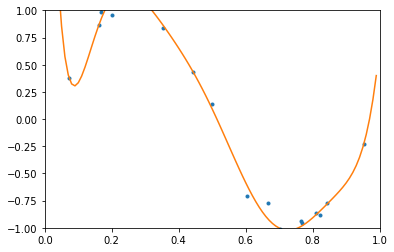

In [38]:
#use leastSquares
def leastSquares(X, Y, degree):      
    Xs = []
    for i in range(degree+1):
        Xs.append(X**i)
    Xs = np.array(Xs).T
    Y = Y.T
    XT = Xs.transpose()
    W = np.dot(np.dot(np.linalg.inv(np.dot(XT,Xs)),XT),Y)
    return W[::-1]

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))

print(leastSquares(x, y, 9))

#use polyfit
f = np.polyfit(x, y, 9) 
p = np.poly1d(f)
print(f)
x_pred = np.arange(0.0, 1.0, 0.01)
y_pred = p(x_pred)

plt.axis([0,1,-1,1])
plt.plot(x, y, '.')
plt.plot(x_pred, y_pred)
plt.show()

Fitting Parameters: [-5.71801575e+03  3.26306849e+04 -7.78537135e+04  1.01676900e+05
 -7.97313214e+04  3.86612793e+04 -1.14466988e+04  1.93572802e+03
 -1.59384267e+02  5.19870176e+00]


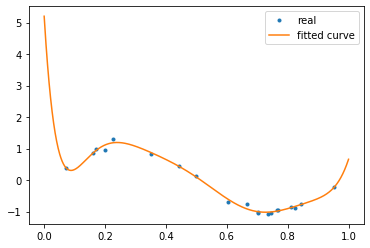

In [42]:
#use leastSq
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(M=0):
    
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    plt.plot(x, y, '.', label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.legend()
    return p_lsq

x_points = np.linspace(0, 1, 1000)
p_lsq_0 = fitting(M=9)


In [7]:
#day3 7.11

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = p(x)
rmse_pred = rmse(y_pred, y)
print("rms error is: " + str(rmse_pred))

rms error is: 0.44030722285756535


In [8]:
#day3 7.12

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

f = np.polyfit(x_train, y_train, 3)
p = np.poly1d(f)

In [9]:
#day3 7.13

y_train_pred = p(x_train)
rmse_train = rmse(y_train_pred, y_train)
print("rms error is: " + str(rmse_train))

rms error is: 0.11273188397702011


In [10]:
#day3 7.14

y_test_pred = p(x_test)
rmse_test = rmse(y_test_pred, y_test)
print("rms error is: " + str(rmse_test))

rms error is: 0.13425276451867943


[0.3911444088260878, 0.38950827100778623, 0.11273188397702011, 0.11273017796423569, 0.09940253906796913, 0.09831711588455674, 0.09578146175190504, 0.09415043845454278, 0.09379393205081847] [0.48488451314994147, 0.48879908630028873, 0.13425276451867943, 0.1342278944857114, 0.11312109610022668, 0.11820002270001094, 0.1177995524652538, 0.12598100258341563, 0.1219213692475982]
<class 'list'>


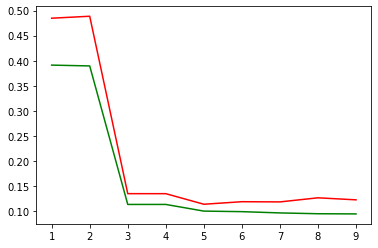

In [11]:
#day3 7.15

M = [1,2,3,4,5,6,7,8,9]
RMSE_train = []
RMSE_test = []

for num in M:
    f = np.polyfit(x_train, y_train, num) 
    p = np.poly1d(f)
    y_train_pred = p(x_train)
    rmse_train = rmse(y_train_pred, y_train)
    RMSE_train.append(rmse_train)
    y_test_pred = p(x_test)
    rmse_test = rmse(y_test_pred, y_test)
    RMSE_test.append(rmse_test)

print (RMSE_train, RMSE_test)
print (type(RMSE_train))
plt.plot(M, RMSE_train, color='green', label='training error')
plt.plot(M, RMSE_test, color='red', label='testing error')

#day3 7.16 略